In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import scipy.spatial.distance as metric
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset = pd.read_csv("Data_Cortex_Nuclear.csv")

In [3]:
# Extract the 77 protein modifications
data = dataset.iloc[:,1:78]

# Mean imputation of missing values in the dataset with mean column values
for i, col in enumerate(data):
    data.iloc[:, i] = data.iloc[:, i].fillna(data.mean(axis=1))

In [4]:
# Extract the class labels from the dataset
enc = LabelEncoder()
dataset['class'] = enc.fit_transform(dataset['class'])
class_labels = dataset['class'].values

In [5]:
# Euclidean Distance Calculator
def euclidean_dist(a, b):
    return metric.euclidean(a, b)

# Initialize the k random centroids for k clusters
def initCentroids(k, data):
    # Number of features in dataset
    d = data.shape[1]

    # The centroids
    centroids = np.mat(np.zeros((k,d)))

    # Create random centroids (get min and max feature values, randomize in that range)
    for j in range(d):
        min_j = min(data.iloc[:,j])
        range_j = float(max(data.iloc[:,j]) - min_j)
        centroids[:,j] = min_j + range_j * np.random.rand(k, 1)
    
    return centroids

# k-mean clustering function
# Input parameters: dataset, the number of clusters k and initial centers
# Output: Cluster label for each partition and the converged centers, final set of centroids
def createClusters(data, k, cents):
    
    # Number of training data
    m = data.shape[0]

    # Hold the instance cluster assignments
    cluster_assignments = np.mat(np.zeros((m, 2)))   

    # Preserve original centroids
    cents_orig = cents.copy()

    changed = True
    num_iter = 0

    # Loop until no changes to cluster assignments
    while changed:

        changed = False

        # For every instance (row in dataset)
        for i in range(m):

            # Track minimum distance, and vector index of associated cluster
            min_dist = np.inf
            min_index = -1

            # Calculate distances
            for j in range(k):

                dist_ji = euclidean_dist(cents[j,:], data.iloc[i,:])
                if dist_ji < min_dist:
                    min_dist = dist_ji
                    min_index = j

            # Check if cluster assignment of instance has changed
            if cluster_assignments[i, 0] != min_index: 
                changed = True

            # Assign instance to appropriate cluster
            cluster_assignments[i, :] = min_index, min_dist**2

        # Update centroid location
        for cent in range(k):
            points = data.iloc[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
            cents[cent,:] = np.mean(points, axis=0)

        # Count iterations
        num_iter += 1
        
    return cluster_assignments[:,0], cents

In [6]:
# Function call createClusters() for k=2
# Initialize the random centriods
cents = initCentroids(2, data)
cluster_labels, centroids = createClusters(data, 2, cents)
print('---------- k=2 ----------')
print(cluster_labels)
print(centroids)

# Function call createClusters() for k=3
# Initialize the random centriods
cents = initCentroids(3, data)
cluster_labels, centroids = createClusters(data, 3, cents)
print('---------- k=3 ----------')
print(cluster_labels)
print(centroids)

# Function call createClusters() for k=4
# Initialize the random centriods
cents = initCentroids(4, data)
cluster_labels, centroids = createClusters(data, 4, cents)
print('---------- k=4 ----------')
print(cluster_labels)
print(centroids)

# Function call createClusters() for k=5
# Initialize the random centriods
cents = initCentroids(5, data)
cluster_labels, centroids = createClusters(data, 5, cents)
print('---------- k=5 ----------')
print(cluster_labels)
print(centroids)

---------- k=2 ----------
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
[[0.45770999 0.67100473 0.34652659 2.51841481 4.45694949 0.24619398
  0.18953949 4.3496059  0.22725966 1.52760253 0.58853185 0.34116909
  0.34373436 0.29357224 0.90123389 0.84360872 1.74679356 1.66843832
  0.4636999  0.74820499 0.39856676 0.38250219 0.18663461 1.34783339
  2.79309461 1.26600409 0.25545324 0.29470802 0.76548433 0.17329932
  0.42723769 2.38789748 0.58037847 0.47634355 0.43070305 0.82156507
  0.60811246 0.39766856 0.60440558 0.37827625 0.3315749  0.44442964
  0.4114169  0.1904258  1.01012607 0.16151242 1.7532726  0.30057664
  0.42998672 1.36879206 0.19762499 0.16347643 0.18643326 0.12663919
  0.16068538 0.19037492 0.20714723 0.11894184 0.22664663 0.13191521
  0.52250168 0.29391201 1.61114795 2.30582903 0.15825757 1.29510647
  0.85976274 0.22373873 0.26687161 0.26375668 0.12663919 0.14595488
  0.47389127 0.26845187 0.26440845 0.36085614 1.31926784]
 [0.39457425 0.56288372 0.29288941 2.06710916 3.21477615 0

In [7]:
# Cluster evaluation using RAND index and adjusted RAND index

# Array of adjusted RAND index of clusters with k value ranging from 2 to 10
ARIs=[]
nums=range(2,11)

# k-mean clustering for k value ranging from 2 to 10
for k in nums:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    cluster_labels = kmeans.predict(data)
    rand_score = metrics.adjusted_rand_score(class_labels, cluster_labels)
    ARIs.append(rand_score)

In [8]:
# Adjusted RAND Index summary for k values 2 to 10
table = {'Cluster (k)': nums, 'RAND index': ARIs}
df = pd.DataFrame(data=table)
df

,Cluster (k),RAND index
0,2,0.015099
1,3,0.072889
2,4,0.087346
3,5,0.096417
4,6,0.116501
5,7,0.140047
6,8,0.145392
7,9,0.141609
8,10,0.142210


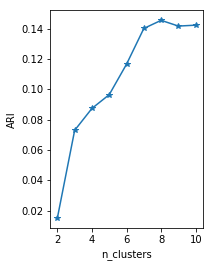

In [9]:
# Visualization of adjusted RAND index of clusters with k value ranging from 2 to 10
fig=plt.figure()
ax=fig.add_subplot(1,2,1)
ax.plot(nums,ARIs,marker="*")
ax.set_xlabel("n_clusters")
ax.set_ylabel("ARI")
plt.show()

#### Conclusion based on analysis:

K-Means is dependent upon its random centroid initialization. Based on different random starts we can get different clusterings each time. This does not guarantee much confidence in any of the resulting individual clusters. 

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. The value of adjusted RAND index can range from 0 to 1, 1 being identical clusters and 0 being random clusters with very less similarity.

In this problem, we use class labels from the mice dataset as a reference to compare the cluster labels of the clusters with k values ranging from 2 to 10 and the result is summarized in a table as well as plotted in a graph. As we can see that the adjusted RAND index for all clusters with k values 2 to 10 are tending towards 0, proving that the clusters are random and has very less similarity with the original class value. The number of classes in the mice dataset is 8. We notice that as k value increases from 2 to 10, the adjusted RAND index also increases rapidly and reaches it maximum at k=8. So we can say that a high value of k=8 is best for clustering this dataset.  